In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import datasets, callbacks, models
from tensorflow.keras import layers, regularizers, activations
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print("[INFO] Loading Fashion_Mnsit Datasets... \n")
(train_X, train_Y), (test_X, test_Y) = datasets.fashion_mnist.load_data()

print("train_X shape: ", train_X.shape)     # (60000, 28, 28)
print("test_Y shape: ", test_Y.shape)       # (10000,)


# Normalize pixel values to be between 0 and 1
train_X_norm, test_X_norm = train_X.astype('float32')/255., test_X.astype('float32')/255.


# Zero-Centered
mean = np.mean(train_X_norm, axis = 0)
train_X_norm -= mean
test_X_norm -= mean


# One_Hot_Encode Transform (convert the labels from integer to vector)
def one_hot_encode(Y):
    Y_onehot = np.zeros((Y.shape[0], np.max(Y) + 1), dtype = 'float32')
    Y_onehot[np.arange(Y.shape[0]), Y] = 1
    
    return Y_onehot

train_Y_onehot = one_hot_encode(train_Y)
test_Y_onehot = one_hot_encode(test_Y)

print("\n[INFO] Transform One_Hot_Encode... \n")
print("train_Y to one_hot: \n", train_Y_onehot)
print("\ntest_Y to one_hot: \n", test_Y_onehot)

[INFO] Loading Fashion_Mnsit Datasets... 

train_X shape:  (60000, 28, 28)
test_Y shape:  (10000,)

[INFO] Transform One_Hot_Encode... 

train_Y to one_hot: 
 [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

test_Y to one_hot: 
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Set fMnist class

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# Plot raw image 

def plot_image_label_condition(X, Y, num, n_rc = (5, 5)):
    plt.figure(figsize = (10, 10), tight_layout = True)
    n_row, n_col = n_rc

    for i in range(num):
        plt.subplot(n_row, n_col, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(X[i], cmap = plt.get_cmap('gray'))
        plt.xlabel(class_names[Y[i]])
    plt.show()

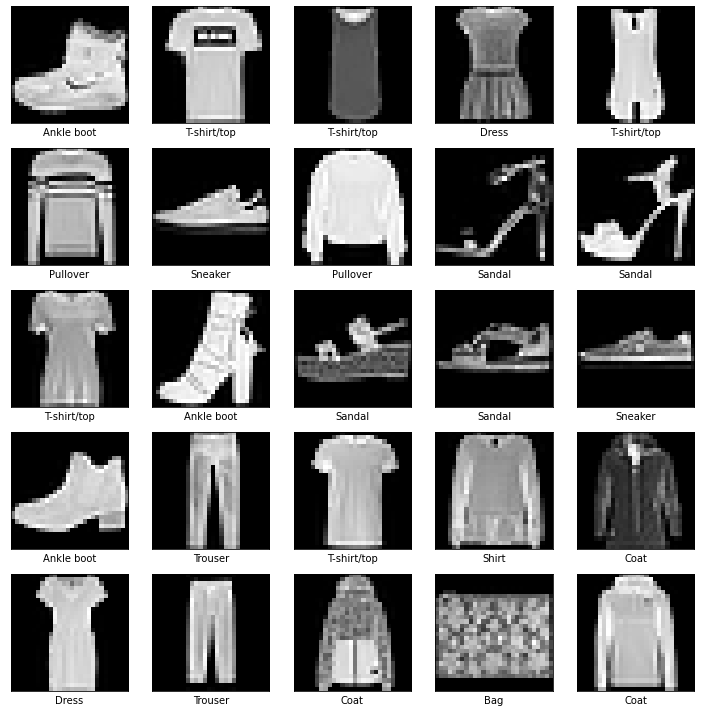

In [ ]:
plot_image_label_condition(train_X, train_Y, 25)

In [ ]:
# Build the VGG-small model

# decay = 1e-4

def fmnist_model(decay = 1e-4):
    model = models.Sequential()

    # stage_1
    model.add(layers.Conv2D(64, (3, 3), kernel_initializer = "he_normal",
                            padding = "same", activation = "relu", input_shape = (28, 28, 1)))   #  kernel_regularizer = regularizers.l2(decay),
    model.add(layers.Conv2D(64, (3, 3),
                            padding = "same", activation = "relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Dropout(0.3))

    # stage_2
    model.add(layers.Conv2D(128, (3, 3), kernel_initializer = "he_normal", 
                            padding = "same", activation = "relu"))
    model.add(layers.Conv2D(128, (3, 3),
                            padding = "same", activation = "relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Dropout(0.3))

    # stage_3
    model.add(layers.Conv2D(256, (3, 3), kernel_initializer = "he_normal", 
                            padding = "same", activation = "relu"))
    model.add(layers.Conv2D(256, (3, 3),
                            padding = "same", activation = "relu"))
    model.add(layers.Conv2D(256, (3, 3), 
                            padding = "same", activation = "relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Dropout(0.3))

    # stage_4
    # model.add(layers.Conv2D(512, (3, 3), kernel_initializer = "he_normal",
    #                         padding = "same", activation = "relu"))
    # model.add(layers.Conv2D(512, (3, 3), 
    #                         padding = "same", activation = "relu"))
    # model.add(layers.Conv2D(512, (3, 3), 
    #                         padding = "same", activation = "relu"))
    # model.add(layers.BatchNormalization())
    # model.add(layers.MaxPool2D(2, 2))
    # model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(2048, 
                           activation = "relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512, 
                           activation = 'relu'))
    model.add(layers.Dense(10, activation = 'softmax'))

    return model

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_31 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 14, 14, 128)      

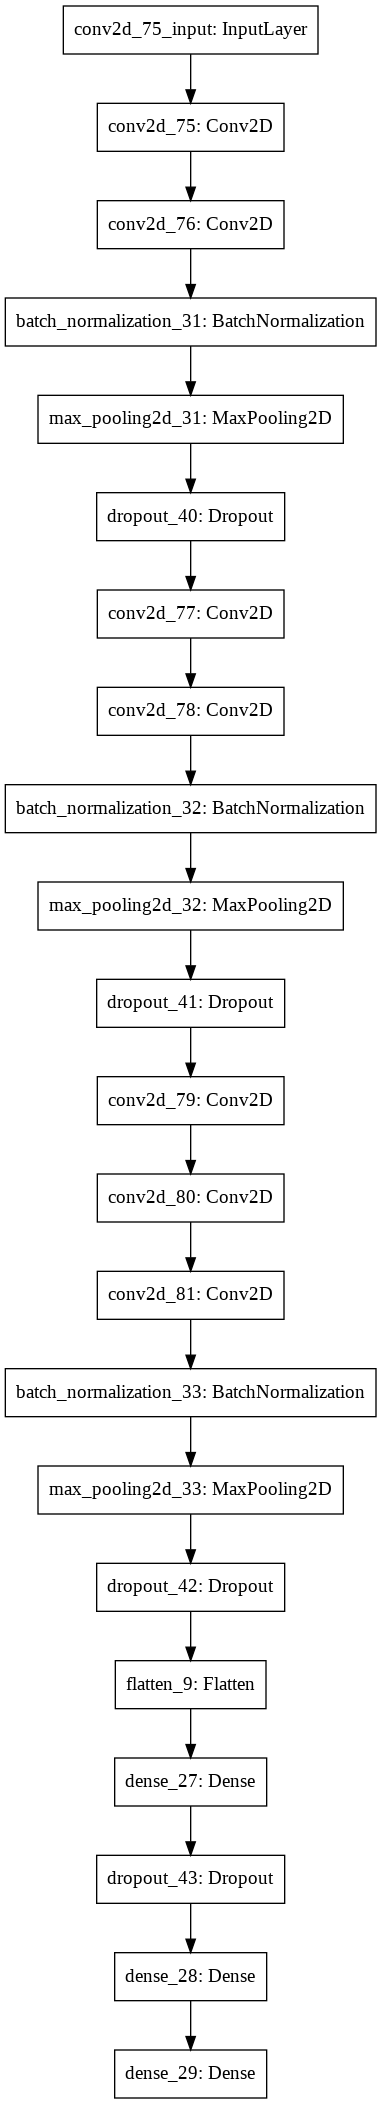

In [ ]:
# Subclassing not have model.summary()

fmnist = fmnist_model()
fmnist.summary()

keras.utils.plot_model(fmnist)

In [ ]:
# Construct the image generator for Data Augmentation

data_aug = ImageDataGenerator(width_shift_range = 0.2, 
                              height_shift_range = 0.2, 
                            #   rotation_range = 20, 
                              horizontal_flip = True)   


# In case of grayscale data, the channels axis of the image array should have value 1

def expand_dims(train_X, test_X):
    X_newaxis = train_X[:, :, :, np.newaxis]  #  add new axis --> grayscale
    X_expand = np.expand_dims(test_X, axis = 3)

    return X_newaxis, X_expand

train_X_newaxis, test_X_newaxis = expand_dims(train_X_norm, test_X_norm)

print(train_X_newaxis.shape, test_X_newaxis.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os

DRIVE = "/content/drive/MyDrive/"

ML_PATH = "大伯 - ML_Code/"

if os.path.isdir(os.path.join(DRIVE, 'Colab Notebooks/')):
    MODEL_PATH = os.path.join(DRIVE, 'Colab Notebooks/', ML_PATH)   # drive_1
else:
    MODEL_PATH = os.path.join(DRIVE, ML_PATH)                       # drive_2

os.listdir(MODEL_PATH)

['fMnist_classifier.ipynb',
 'cifar10_cnn_orig.py',
 'Vgg16_acc_0.89_fig.png',
 'ResNet9_128_batch_acc_0.9392_fig.png',
 'best_cifar10_weights.h5',
 'ResNet9_128_batch_acc_0.9332_fig.png',
 'tf_tuner.py',
 'cifar10_convert_img.ipynb',
 'tf_tuner.ipynb',
 'cifar10_classifier.ipynb',
 'test_model.ipynb',
 'best_fmnist_weights.h5',
 'hyper_dir',
 'model_weights',
 'cifar-10-batches-py']

In [ ]:
# Golab GPU devices status

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
! nvidia-smi 

Num GPUs Available:  1
Sun Aug 15 16:23:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    29W /  70W |   4826MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                 

In [ ]:
# Compile and Fit the model

Batch = 32    # 32, 64, 128, 256 --> default: 32 batch_size is the best
Epochs = 70
Patience = 10

fmnist_best_weights = os.path.join(MODEL_PATH, "best_fmnist_weights.h5")

# optimizer = keras.optimizers.SGD(learning_rate = 0.1, clipvalue = 0.1)  
fmnist.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])


# Performance Scheduling
performance_scheduler = callbacks.ReduceLROnPlateau(factor = 0.2, patience = 3, min_lr = 1e-4)   # min_lr = 0.5e-6


check_point = callbacks.ModelCheckpoint(fmnist_best_weights, monitor = "val_loss", save_best_only = True)
early_stop = callbacks.EarlyStopping(monitor = "val_loss", patience = Patience, restore_best_weights = True)

call_backs = [early_stop, check_point, performance_scheduler]   


history = fmnist.fit(data_aug.flow(train_X_newaxis, train_Y_onehot, Batch), epochs = Epochs, 
                     steps_per_epoch = len(train_X) // Batch,
                     validation_data = (test_X_newaxis, test_Y_onehot), 
                     callbacks = call_backs)    # initial_epoch = 0

Epoch 1/70
1875/1875 [==============================] - 28s 15ms/step - loss: 0.8157 - accuracy: 0.7034 - val_loss: 0.6639 - val_accuracy: 0.7683
Epoch 2/70
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5342 - accuracy: 0.8080 - val_loss: 0.4270 - val_accuracy: 0.8438
Epoch 3/70
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4614 - accuracy: 0.8353 - val_loss: 0.4362 - val_accuracy: 0.8404
Epoch 4/70
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4215 - accuracy: 0.8485 - val_loss: 0.3514 - val_accuracy: 0.8687
Epoch 5/70
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3852 - accuracy: 0.8628 - val_loss: 0.3035 - val_accuracy: 0.8889
Epoch 6/70
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3629 - accuracy: 0.8700 - val_loss: 0.3482 - val_accuracy: 0.8716
Epoch 7/70
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3392 - accuracy: 0.8795 - val_loss: 0.2962 -

In [ ]:
test_loss, test_acc = fmnist.evaluate(test_X_newaxis, test_Y_onehot, verbose = 2)

print(f"test_loss: {test_loss:.4f}")
print(f"test_acc: {test_acc:.4f}")

313/313 - 1s - loss: 0.1714 - accuracy: 0.9404
test_loss: 0.1714
test_acc: 0.9404
